# Projet simulation logicielle
* *Rhouch Oussama*
* *Cherki Inssaf*

## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import glob
from sklearn import preprocessing
from scipy.io.wavfile import write
import zipfile

## Load Data

##### unzipping the data

In [5]:
zip_file_paths = ['data/data_part1.zip', 'data/data_part2.zip', 'data/data_part3.zip', 'data/data_part4.zip']

for zip_file_path in zip_file_paths:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(".")

##### Load clean voice data

In [2]:
s, s_rate = librosa.load('data/clean/dev-clean/2086/149214/2086-149214-0001.flac') # load audio file and sampling rate

##### Plot the clean voice data

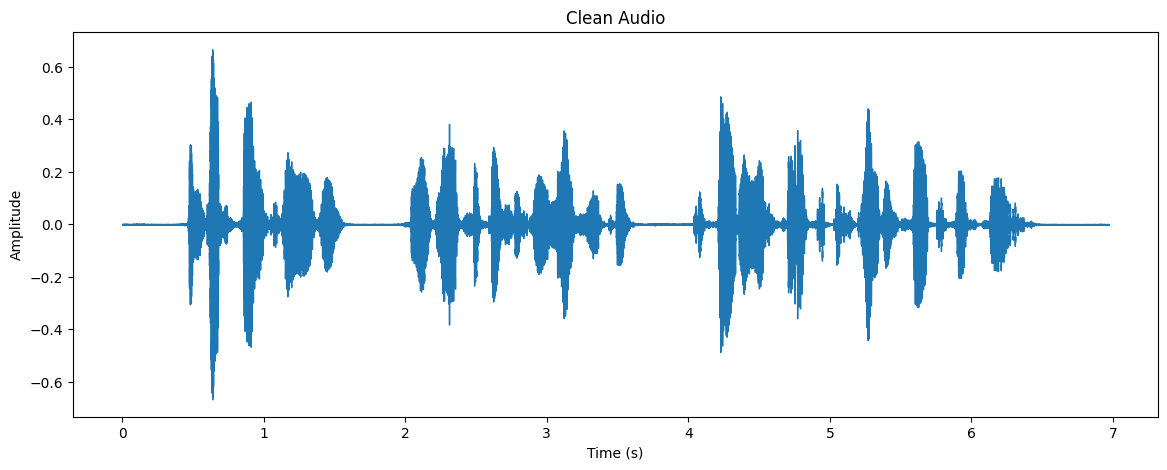

In [3]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(s, sr=s_rate)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Clean Audio')
plt.show()

##### Load the noise data

In [4]:
u, u_rate = librosa.load('data/noise/babble_16k.wav') # load noise file and sampling rate

##### Plot the noise data

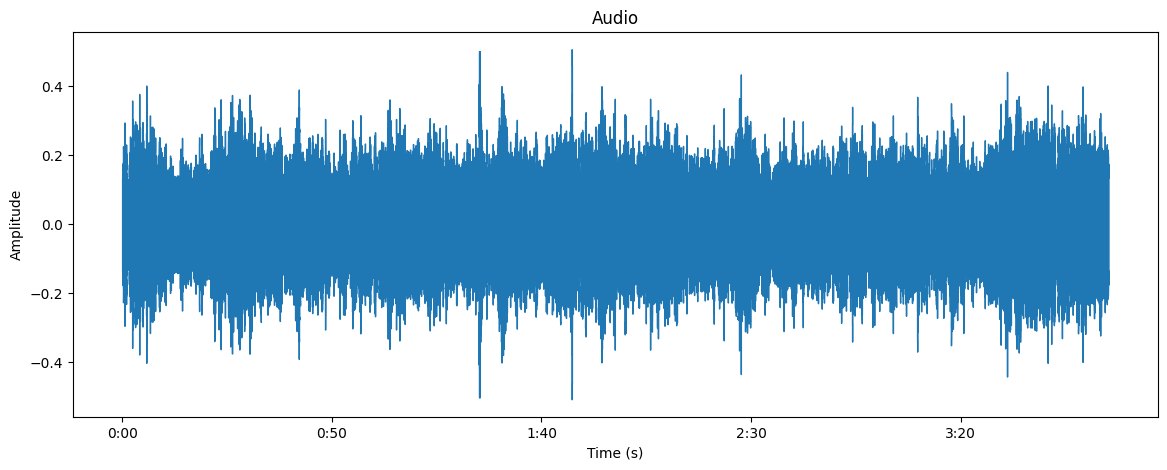

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(u, sr=u_rate)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio')
plt.show()

##### Normalize the data

In [6]:
s_norm = preprocessing.normalize([s]) # normalize the clean audio
u_norm = preprocessing.normalize([u[:len(s)]]) # normalize the noise audio and cut it to the same length as the clean audio

##### Fourier transform of clean noise data

In [7]:
S = librosa.stft(s_norm[0]) # STFT of clean audio
Sdb = librosa.amplitude_to_db(abs(S)) # convert to dB

##### Plot the Fourier transform of clean noise data

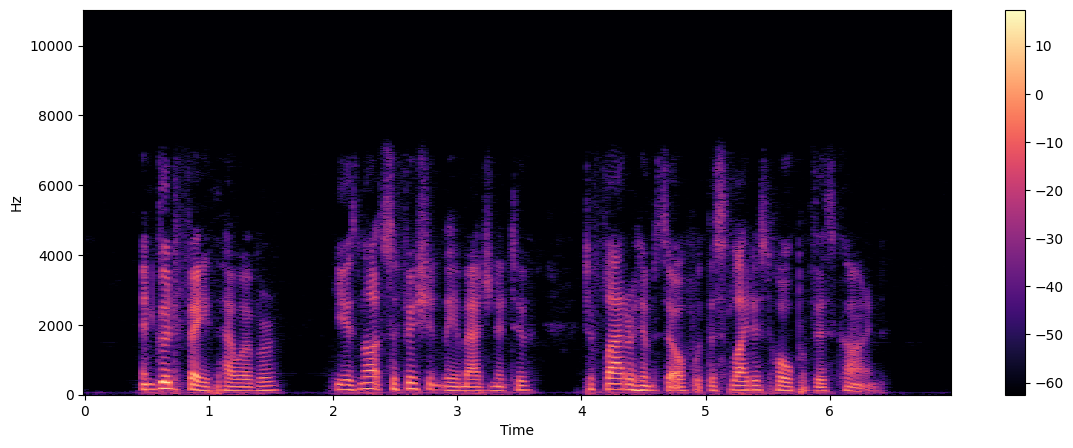

In [8]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Sdb, sr=s_rate, x_axis='time', y_axis='hz') # plot spectrogram
plt.colorbar()

##### Fourier transform of noise data

In [9]:
U = librosa.stft(u_norm[0]) # STFT of noise audio
Udb = librosa.amplitude_to_db(abs(U)) # convert to dB

##### Plot the Fourier transform of noise data

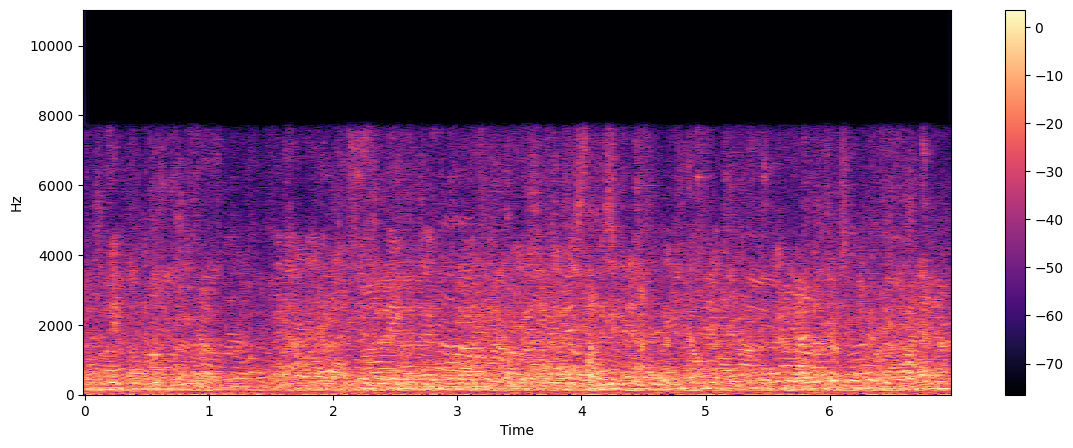

In [10]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Udb, sr=u_rate, x_axis='time', y_axis='hz') # plot spectrogram
plt.colorbar()

##### defining alpha

In [11]:
def alpha(RSB):
    return 10 ** (-RSB / 20)

##### Add noise to the clean voice data

In [12]:
x = s_norm + alpha(5) * u_norm # add noise to clean audio with RSB = 5

##### Plot the noisy voice data

(1, 153689) (1, 153689)


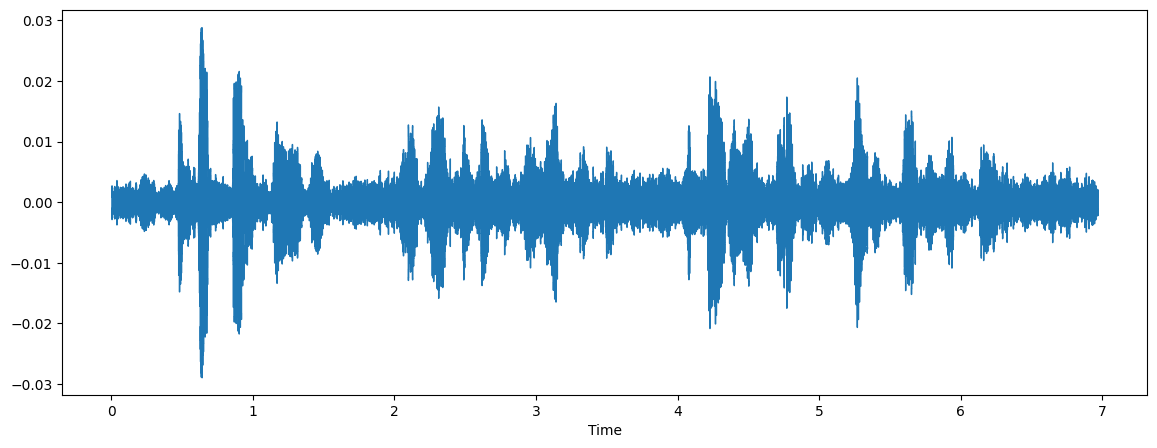

In [13]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=s_rate) # plot waveform of noisy audio
print(x.shape, s_norm.shape)

##### Fourier transform of noisy voice data

In [14]:
X = librosa.stft(x[0]) # STFT of noisy audio
Xdb = librosa.amplitude_to_db(abs(X)) # convert to dB

##### Plot the Fourier transform of noisy voice data

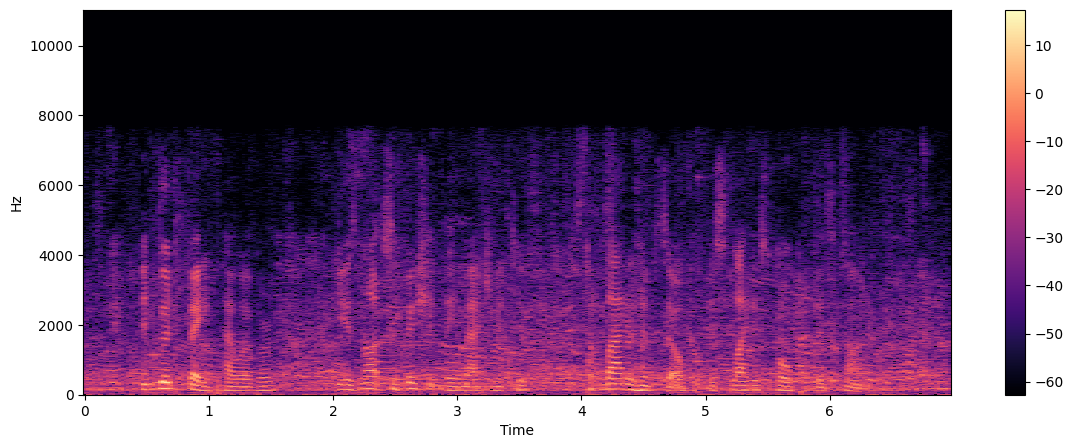

In [15]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=u_rate, x_axis='time', y_axis='hz') # plot spectrogram
plt.colorbar()

##### Root mean square of the noisy voice data

In [16]:
u1, u1_rate = librosa.load('data/noise/babble_16k.wav') # load noise file and sampling rate
U1, phase = librosa.magphase(librosa.stft(u1)) # STFT of noise audio and phase
rms = librosa.feature.rms(S=U1) # root mean square of noise audio

##### Spectrogram of the noisy voice data

[Text(0.5, 1.0, 'log Power spectrogram')]

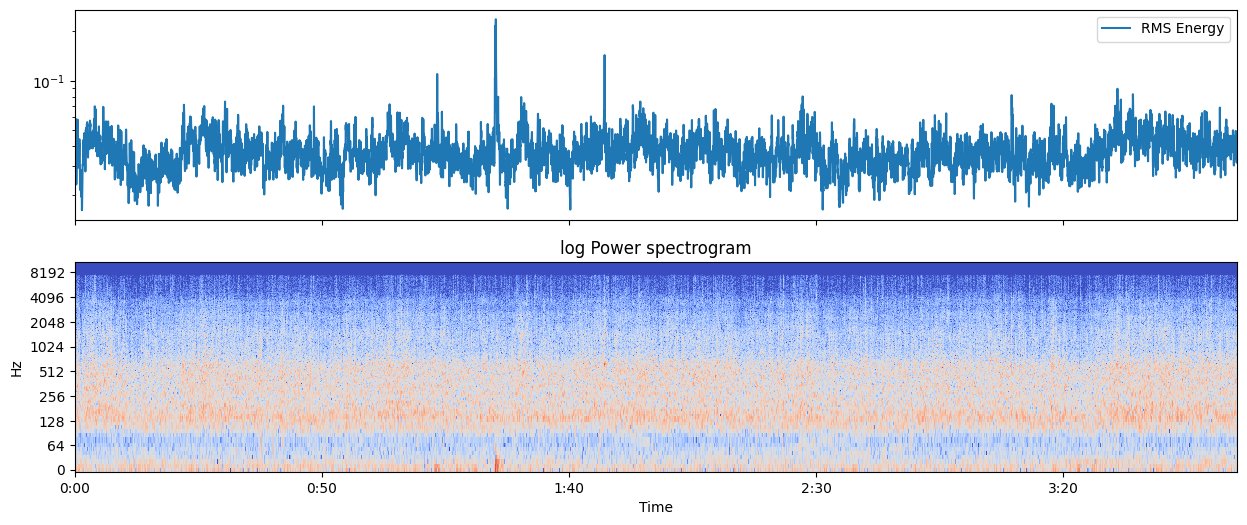

In [17]:
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms) # time vector
ax[0].semilogy(times, rms[0], label='RMS Energy') # plot RMS
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(U1), y_axis='log', x_axis='time', ax=ax[1]) # plot spectrogram
ax[1].set(title='log Power spectrogram')

##### Load noisy voice data and all clean voice data files

In [18]:
noise_file = glob.glob('data/noise/*.wav', recursive=True) # load all noise files
files = glob.glob('data/clean/dev-clean/**/**/*.flac', recursive=True) # load all clean files
print(len(files),'clean data files')
print(files[0:4])

7959 clean data files
['data/clean/dev-clean\\1272\\128104\\1272-128104-0000.flac', 'data/clean/dev-clean\\1272\\128104\\1272-128104-0001.flac', 'data/clean/dev-clean\\1272\\128104\\1272-128104-0002.flac', 'data/clean/dev-clean\\1272\\128104\\1272-128104-0003.flac']


##### Magnitude of the Fourier transform of the noisy voice data

In [21]:
magnitude_clean, _ = librosa.magphase(S) # magnitude of clean audio
magnitude_clean.shape

(1025, 301)

##### Phase of the Fourier transform of the noisy voice data

In [22]:
_, phase_noise = librosa.magphase(U) # phase of noise audio
phase_noise.shape

(1025, 301)

##### Inverse Fourier transform of the noisy voice data

In [25]:
test = np.array(magnitude_clean*phase_noise) # multiply magnitude of clean audio with phase of noise audio
output_clean = librosa.istft(test) # inverse STFT
output_clean.shape

(153600,)

##### Write the inverse Fourier transform of the noisy voice data to a wav file

In [26]:
write("generated/test.wav", s_rate, output_clean) # write to file the generated clean audio .wav

##### Write the inverse Fourier transform of the noisy voice data to a flac file

In [27]:
write("generated/test.flac", s_rate, output_clean) #  write to file the generated clean audio .flac